In [1]:
# -*- coding: utf-8 -*-
%matplotlib inline
%load_ext autoreload
%autoreload 2

# add path
import sys
my_path = r'D:\Documents\etudes\epfl\MA1\cours\MachineLearning\Project1'
sys.path.insert(0,my_path + r'\code\COMMON')

# basic imports 
import numpy as np

# Build dataset

In [2]:
from proj1_helpers import load_csv_data 
from outliers import handle_outliers
from standard import standardize

# load raw data
y_raw, input_data_raw, ids = load_csv_data(my_path + r'\data\train.csv', sub_sample=False)

# handle outliers
X0, y = handle_outliers(input_data_raw, y_raw, -999, True)

# standardize
X0, mean_X0, std_X0 = standardize(X0)

samples with -999 are removed from the dataset 


# Build logistic regression model

In [3]:
# choose the features
ind_features = [12, 13, 1, 11, 22, 4, 19, 29, 16, 3, 23, 2, 7, 6, 21, 26, 18, 28, 9, 20, 14]
X = X0[:, ind_features]
print(X.shape)

# parameters
arg_lr = dict()
arg_lr['method'] = 'lr'
arg_lr['loss'] = 'logLikelihood'
arg_lr['method_minimization'] = 'gd' # 'gd' (gradient_descent) or 'newton'

(68114, 21)


# Optimize the step descent gamma

## 1) Try some values to define an interval of research for gamma

Logistic Regression Regularized (49/49): loss logLikelihood=-14131.604023586618


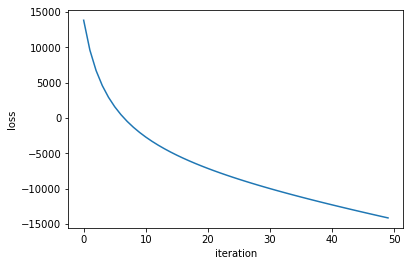

In [9]:
# input params 
degree = 1
lambda_ = 0
gamma = 1e-6
method = 'gd'

# build polynomial basis function
phi = build_poly(X, degree)

# optimization params
initial_w = np.zeros(phi.shape[1])
max_iters = 50
    
# logistic regression
w_tot, loss_tot = reg_logistic_regression(y, phi, initial_w, max_iters, gamma, method, lambda_)

# plot results
plt.figure()
plt.plot(range(max_iters), loss_tot)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

## 2) Optimize gamma

tested gamma:  [  1.00000000e-10   1.00000000e-09   1.00000000e-08   1.00000000e-07
   1.00000000e-06   1.00000000e-05   1.00000000e-04   1.00000000e-03
   1.00000000e-02   1.00000000e-01]
------------------------ test with gamma =  1e-10 ------------------------
Number of samples in total:  68114
Number of folds:  2  of 34057 samples.
Logistic Regression (49/49): loss logLikelihood=10242.705572662475
Logistic Regression (49/49): loss logLikelihood=10242.351631914591


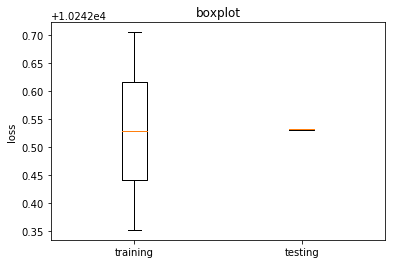

Mean training loss:  10242.5286023
Mean testing loss:  10242.5315372
------------------------ test with gamma =  1e-09 ------------------------
Number of samples in total:  68114
Number of folds:  2  of 34057 samples.
Logistic Regression (49/49): loss logLikelihood=10160.602481386839
Logistic Regression (49/49): loss logLikelihood=10157.085140738229


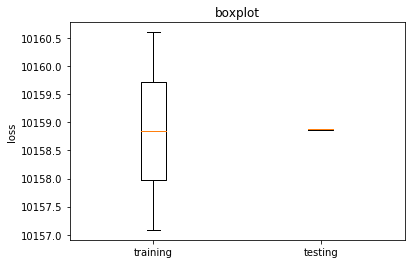

Mean training loss:  10158.8438111
Mean testing loss:  10158.8730083
------------------------ test with gamma =  1e-08 ------------------------
Number of samples in total:  68114
Number of folds:  2  of 34057 samples.
Logistic Regression (49/49): loss logLikelihood=9381.97762643166
Logistic Regression (49/49): loss logLikelihood=9348.91047668411


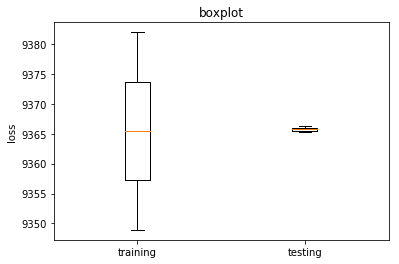

Mean training loss:  9365.44405156
Mean testing loss:  9365.72148318
------------------------ test with gamma =  1e-07 ------------------------
Number of samples in total:  68114
Number of folds:  2  of 34057 samples.
Logistic Regression (49/49): loss logLikelihood=4480.1911862691895
Logistic Regression (49/49): loss logLikelihood=4275.295344946169


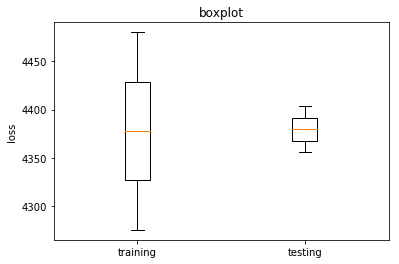

Mean training loss:  4377.74326561
Mean testing loss:  4379.67901104
------------------------ test with gamma =  1e-06 ------------------------
Number of samples in total:  68114
Number of folds:  2  of 34057 samples.
Logistic Regression (49/49): loss logLikelihood=-3775.633131724838
Logistic Regression (49/49): loss logLikelihood=-4493.175683115201


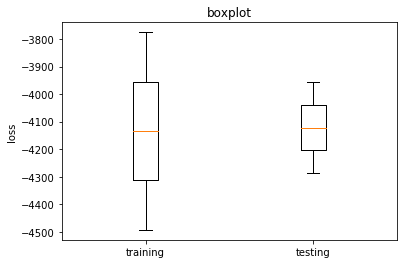

Mean training loss:  -4134.40440742
Mean testing loss:  -4122.36455233
------------------------ test with gamma =  1e-05 ------------------------
Number of samples in total:  68114
Number of folds:  2  of 34057 samples.
Logistic Regression (49/49): loss logLikelihood=-22474.407545685917
Logistic Regression (49/49): loss logLikelihood=-27021.528639569457


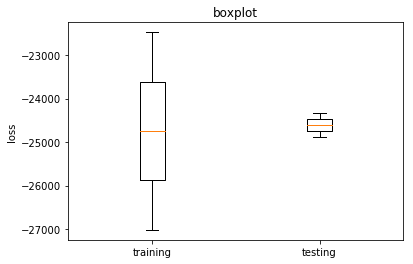

Mean training loss:  -24747.9680926
Mean testing loss:  -24613.285481
------------------------ test with gamma =  0.0001 ------------------------
Number of samples in total:  68114
Number of folds:  2  of 34057 samples.


D:\Documents\etudes\epfl\MA1\cours\MachineLearning\Project1\code\COMMON\costs.py:46: RuntimeWarning: divide by zero encountered in log10
  logLikelihood = logLikelihood + ylabels[i]*np.log10(sigmoid(tx[i,:].T.dot(w))) + (1-ylabels[i])*np.log10(1-sigmoid(tx[i,:].T.dot(w)))


Logistic Regression (49/49): loss logLikelihood=-inf


D:\Documents\etudes\epfl\MA1\cours\MachineLearning\Project1\code\COMMON\costs.py:46: RuntimeWarning: invalid value encountered in double_scalars
  logLikelihood = logLikelihood + ylabels[i]*np.log10(sigmoid(tx[i,:].T.dot(w))) + (1-ylabels[i])*np.log10(1-sigmoid(tx[i,:].T.dot(w)))


Logistic Regression (49/49): loss logLikelihood=nan


C:\Users\Tom\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
C:\Users\Tom\Anaconda3\lib\site-packages\matplotlib\cbook.py:2066: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
C:\Users\Tom\Anaconda3\lib\site-packages\matplotlib\cbook.py:2073: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
C:\Users\Tom\Anaconda3\lib\site-packages\matplotlib\cbook.py:2081: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
C:\Users\Tom\Anaconda3\lib\site-packages\matplotlib\cbook.py:2082: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


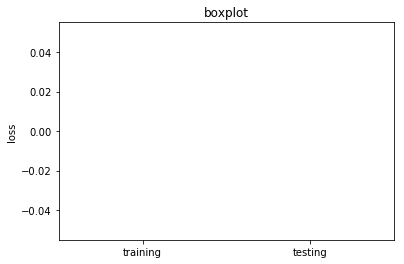

Mean training loss:  nan
Mean testing loss:  nan
------------------------ test with gamma =  0.001 ------------------------
Number of samples in total:  68114
Number of folds:  2  of 34057 samples.


KeyboardInterrupt: 

In [4]:
from t_optimize_hyperparameters import *

# fix the other hyperparameters
arg_lr['lambda_'] = 0
arg_lr['degree'] = 1

# optimization parameters
gamma_min = -10
gamma_max = -1
gamma_steps = 10
arg_lr['k_fold'] = 2
arg_lr['max_iters'] = 50
arg_lr['initial_w'] = np.zeros(X.shape[1]*arg_lr['degree']+1)

# optimize gamma
gamma_opt = optimize_gamma(y, X, gamma_min, gamma_max, gamma_steps, arg_lr)

# Optimize the degree of the polynomial basis function

In [ ]:
arg_lr['k_fold'] = 5
